# AGRIBALYSE - Synthèse
# EXPLORATION DES DONNEES (partie 4)


🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜🚜

🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕🥕

🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖🥖

🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 🍴 

♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ 
♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ ♻ 

Nous reprenons certains éléments des parties précédentes.  
La partie 4 commence au paragraphe du 5e niveau d'exploration. 

# Pour commencer

## Librairies

In [1]:
# general
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

# plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
## fixer le theme
import plotly.io as pio
pio.templates.default = 'ggplot2'

# scikit-learn
## Métriques
from sklearn.metrics import silhouette_score
## Clustering
from sklearn.cluster import KMeans

# yellowbrick
## Clustering
from yellowbrick.cluster import SilhouetteVisualizer

# Données

In [2]:
# importation des données
synthese_data = pd.read_csv('datasets/Agribalyse_Synthese.csv', header=0)

In [3]:
# augmenter le nombre de colonnes visibles
pd.set_option("display.max_columns", 40)

In [4]:
# afficher les 1e lignes
synthese_data.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,Préparation,DQR - Note de qualité de la donnée (1 excellente ; 5 très faible),Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,Pas de préparation,2.46,0.215366,1.221121,0.248176,1.820853,4.658415,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,Pas de préparation,2.46,0.128043,0.612234,0.153879,1.135915,2.784663,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,Pas de préparation,2.46,0.215366,1.221121,0.248176,1.820853,4.658415,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,Pas de préparation,2.44,0.128043,0.612234,0.153879,1.135915,2.784663,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,Pas de préparation,2.20,0.118929,0.861730,0.089663,0.298539,3.065576,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328


#### Création d'une copie

In [5]:
synthese_dataset = synthese_data.copy()

In [6]:
target = "DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"

In [7]:
synthese_dataset = synthese_dataset.drop(['Code AGB', 'Code CIQUAL'], axis=1)

In [8]:
# suppression de "Nom du Produit en Français"
synthese_dataset = synthese_dataset.drop(["Nom du Produit en Français"], axis=1)

In [9]:
# suppression de 'LCI Name'
synthese_dataset = synthese_dataset.drop(['LCI Name'], axis=1)

In [10]:
synthese_dataset = synthese_dataset.drop(["Saisonnalité"], axis=1)

In [11]:
# suppression de la colonne "Transport par avion (1 : par avion)"
synthese_dataset = synthese_dataset.drop(["Transport par avion (1 : par avion)"], axis=1)

In [12]:
plastique_emballage = ['PS', 'LPDE', 'PP', 'Déjà emballé - PET', 'V (PVC)', 'Bouteille PETE',  'HPDE',
                       'Déjà emballé - PP/PE', 'Déjà emballé - LDPE', 'PVC', 'Bouteille PET',]

# 5e niveau d'exploration

On donne ici des compléments divers.  

## Clustering

### DQR

Ils semblent qu'il y aient des groupes de DQR.   
Nous extrayons la colonne des DQR et nous appliquons l'algorithme du Kmeans pour détecter des clusters. D'après l'histogramme des DQR, on peut tester avec 8 clusters. 

In [33]:
model_kmeans = KMeans(n_clusters=8, random_state=0)
model_kmeans.fit(synthese_dataset.loc[:,[target]])

KMeans(random_state=0)

Pour la représentation graphique :
* x correspond aux DQR
* il n'y a pas de y ici, nous avons fixé une valeur arbitraire, y=1. 
* Les valeurs des DQR sont représentées par les différents points. 
* Les centres des clusters sont placés. 

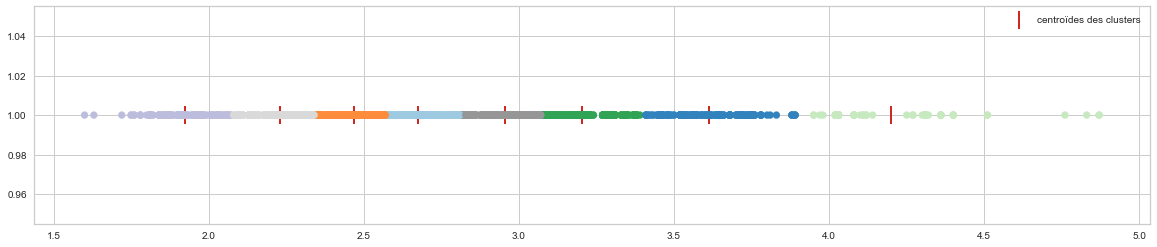

In [34]:
fig = plt.figure(figsize=(20,4))
plt.scatter(x=model_kmeans.cluster_centers_, y=np.ones(len(model_kmeans.cluster_centers_)), 
            c='r', marker="|", s=300, 
            label="centroïdes des clusters")
plt.scatter(x=synthese_dataset.loc[:,[target]], y=np.ones(len(synthese_dataset.loc[:,[target]])), 
            c=model_kmeans.labels_, cmap='tab20c')
plt.legend()
plt.show()

Combien de cluster faudrait-il prendre ?   
Traçons la courbe de l'inertie en fonction du nombre de cluster.  

(inertie = moyenne des carrés des distances entre chaque point et le centroïde le plus proche)

In [35]:
# Dans la liste 'inertia', on met les différentes valeurs d'inertie correspondant aux différents clusters
# On initialise la liste :
inertia = []

# nombre de clusters à tester
K_range = range(1,20) 

# pour chaque nombre de cluster, on entraîne un K-means différent, puis on ajoute son inertie à la liste précédente
for k in K_range:
    model = KMeans(n_clusters=k).fit(synthese_dataset.loc[:,[target]])
    inertia.append(model.inertia_)

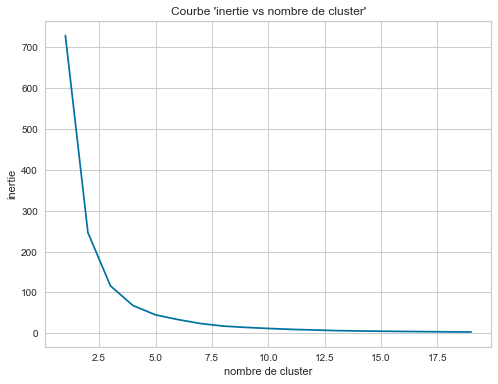

In [36]:
# on affiche la courbe de l'inertie en fonction du nombre de cluster
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia)
plt.xlabel('nombre de cluster')
plt.ylabel('inertie')
plt.title("Courbe 'inertie vs nombre de cluster'")
plt.show()

8 clusters est une valeur possible, on peut aussi prendre 5 :

In [37]:
model_kmeans = KMeans(n_clusters=5, random_state=0)
model_kmeans.fit(synthese_dataset.loc[:,[target]])

KMeans(n_clusters=5, random_state=0)

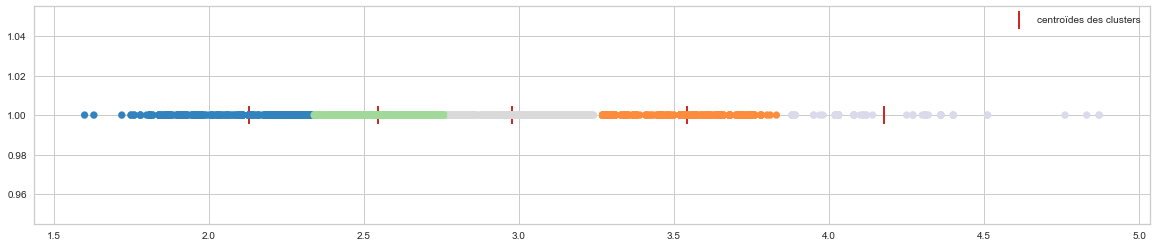

In [38]:
fig = plt.figure(figsize=(20,4))
plt.scatter(x=model_kmeans.cluster_centers_, y=np.ones(len(model_kmeans.cluster_centers_)), 
            c='r', marker="|", s=300, 
            label="centroïdes des clusters")
plt.scatter(x=synthese_dataset.loc[:,[target]], y=np.ones(len(synthese_dataset.loc[:,[target]])), 
            c=model_kmeans.labels_, cmap='tab20c'
           )
plt.legend()
plt.show()

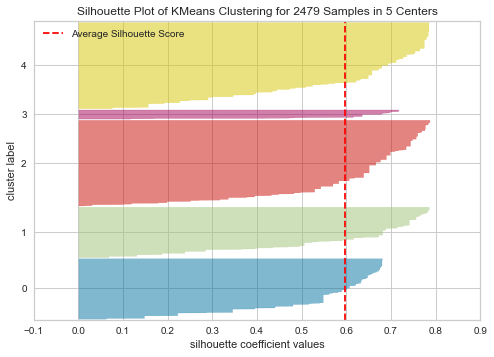

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2479 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')

visualizer.fit(synthese_dataset.loc[:,[target]])        # Fit les données sur le visualizer
visualizer.show()                                       